In [112]:
!pip install pydotplus
!pip install sklearn
!pip install python-graphviz

ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz


In [145]:
#Run this cell
#Importing necessary libraries 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import json

ans=[None]*5

In [146]:
#Download Dataset from https://www.kaggle.com/uciml/zoo-animal-classification

In [147]:
#Import the dataset and define the feature as well as the target datasets / columns
global sheet
sheet = pd.read_csv('G:\My Drive\MLFE\zoo.csv')
#We drop the animal names since this is not a good feature to split the data on  
del sheet['animal_name']

In [148]:
#Write a function to find the entropy on a split "target_col"
def entropy(target_col):
  types, count = np.unique(sheet[target_col], return_counts=True)
  entropy = 0
  tot = len(sheet[target_col])
  for val in count:
    p = val/tot
    entropy += -1*(p*np.log2(p))
  return entropy


In [149]:
#Find the entropy of all the features in the dataset
#Save all the feature names in an array "feature names"
feature_names=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone', 
               'breathes','venomous','fins','legs','tail','domestic','catsize']

entrop = dict()

for feature in feature_names:
    entrop[feature] = entropy(feature)

entrop


{'hair': 0.9840304711717018,
 'feathers': 0.7179499765002912,
 'eggs': 0.9794662187017298,
 'milk': 0.9743197211096903,
 'airborne': 0.7910662980902585,
 'aquatic': 0.9396846718728562,
 'predator': 0.9914266810680206,
 'toothed': 0.9685867165455516,
 'backbone': 0.6761627418829198,
 'breathes': 0.7374895672137456,
 'venomous': 0.3993820824245975,
 'fins': 0.653839880626333,
 'legs': 2.0338113440641234,
 'tail': 0.8228368841492257,
 'domestic': 0.5538976334852962,
 'catsize': 0.9880162151534646}

In [150]:
#Find the entropy of the feature "toothed"
...
ans[0]=entrop['toothed']

In [151]:
#Write a function to calculate Information Gain on a split attribute and a target column
def InfoGain(data,split_attribute_name,target_name="class"):       
    #Calculate the entropy of the total dataset  
    initial = entropy(target_name)
    #Calculate the values and the corresponding counts for the split attribute   
    class container:
        def __init__(self, split, judge):
            self.split = dict()

            split_name = np.unique(sheet[split])

            judge_name = np.unique(sheet[judge])

            for name in split_name:
                self.split[name] = dict()
                for name_2 in judge_name:
                    self.split[name][name_2] = len((sheet[sheet[split] == name])[sheet[judge]==name_2])

        def splitEntropy(self, split_index):
            tot = 0
            entropie = 0
            for num in self.split[split_index]:
                tot += self.split[split_index][num]

            for num in self.split[split_index]:
                p = self.split[split_index][num]/tot
                entropie -= p*np.log2(p)
                coeff = entropie*tot

            return tot, entropie, coeff
        
        def totEntropy(self):
            tot_tot = 0
            val = 0
            for split in self.split:
                tot, none, pie = self.splitEntropy(split)
                tot_tot += tot
                val += pie

            return val/tot_tot     

            


    box = container(split=split_attribute_name, judge=target_name)
    # print(box.totEntropy())
    return initial - box.totEntropy()


In [121]:
#Find the information gain having split attribute "hair" and the target feature name "milk"

ans[1]=InfoGain(sheet, 'hair', 'milk')
# print(ans)
# print(entropy('milk'))
# print(InfoGain(sheet, 'hair', 'milk'))


[0.9685867165455516, 0.6599660577558697, None, None, None]


C:\Users\togys\AppData\Local\Temp\ipykernel_29752\4231718588.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  self.split[name][name_2] = len((sheet[sheet[split] == name])[sheet[judge]==name_2])


In [122]:
#Find the Info gain having "milk" as the split attribute and all the other features as target features one at a time
for i in feature_names:
    print(InfoGain(sheet, 'milk', i))

0.6599660577558699
nan
0.7870598185734242
nan
0.11370352314621812
0.10181386403185944
0.0006367772440212249
0.3465412540071714
nan
nan
nan
0.018672543666944486
nan
0.03350320459269063
0.019010135775093362
0.2509271768405701


C:\Users\togys\AppData\Local\Temp\ipykernel_29752\4231718588.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  self.split[name][name_2] = len((sheet[sheet[split] == name])[sheet[judge]==name_2])
C:\Users\togys\AppData\Local\Temp\ipykernel_29752\4231718588.py:27: RuntimeWarning: divide by zero encountered in log2
  entropie -= p*np.log2(p)
C:\Users\togys\AppData\Local\Temp\ipykernel_29752\4231718588.py:27: RuntimeWarning: invalid value encountered in double_scalars
  entropie -= p*np.log2(p)


In [140]:
#Import Decision Tree Classifier from sklearn 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#Split the given data into 80 percent training data and 20 percent testing data
x_train , x_test , y_train , y_test = train_test_split(sheet[feature_names], sheet['class_type'], test_size=0.2)

In [141]:
#Fit the given data
algo = DecisionTreeClassifier()
algo.fit(X=x_train, y=y_train)

DecisionTreeClassifier()

In [142]:
#Make a prediction on the test data and return the percentage of accuracy
y_out = algo.predict(x_test)
acc = np.count_nonzero(y_out == y_test)/len(y_out)
ans[2] = acc
acc

1.0

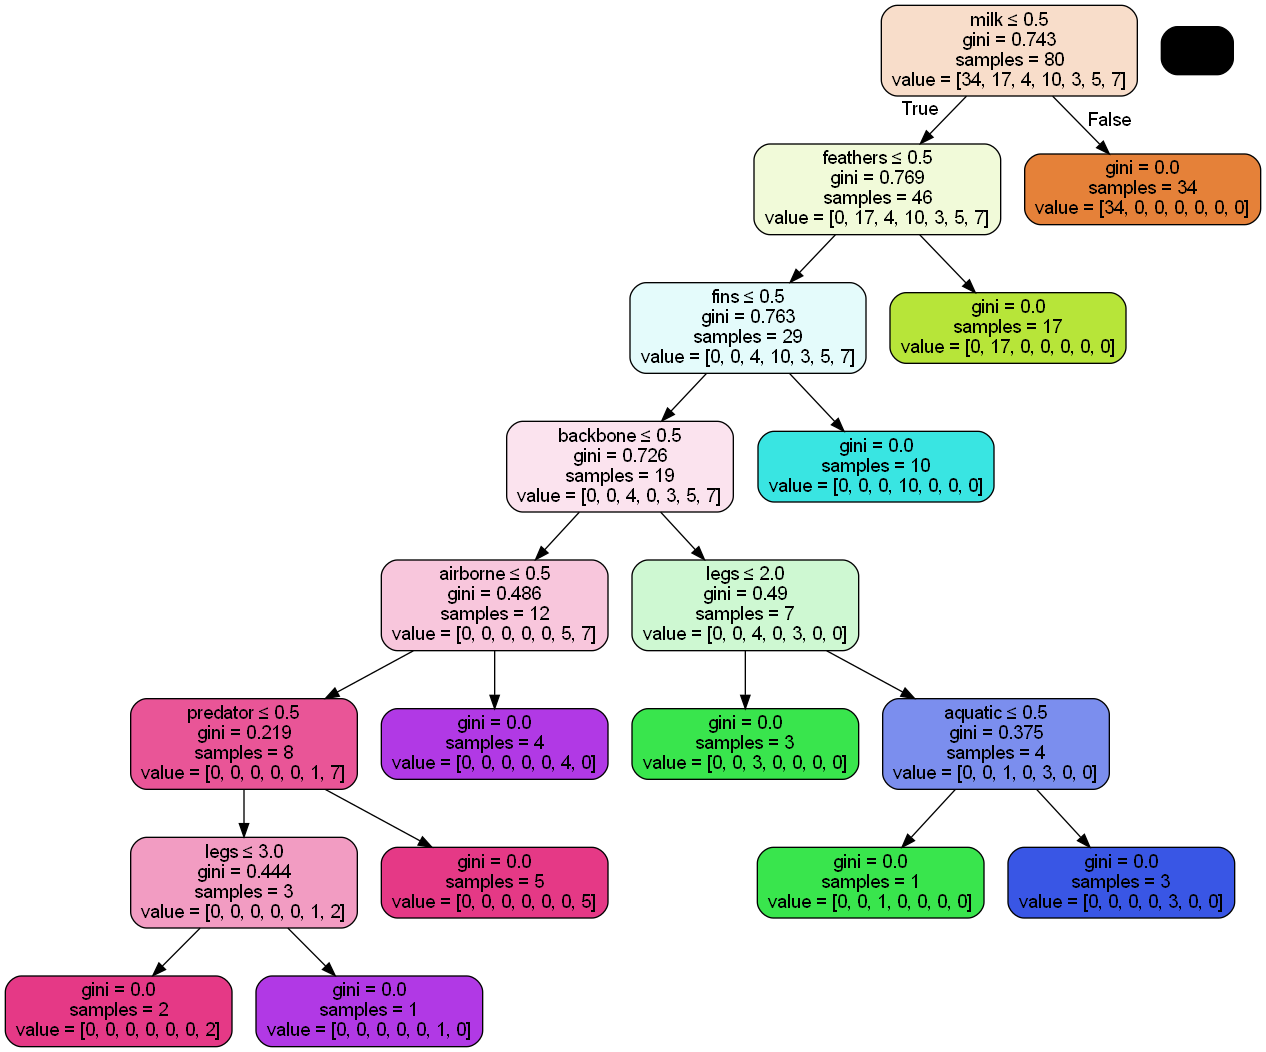

In [143]:
#Run this cell to visualize the decision tree
# %conda install python-graphviz
import six
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(algo, out_file=dot_data, feature_names=feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
#Use sklearn to make a classification report and a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
...
...

In [ ]:
#Find the recall,f1-score for class type '3'
ans[3]=

In [ ]:
#Calculate Mean Absolute Error,Mean Squared Error and Root Mean Squared Error
...
...
...

In [ ]:
#Find the mean absolute error and root mean square error, save then in a list [mae,rmse]
ans[4]=

In [ ]:
ans = [item for item in ans]
with open('ans.json', 'w') as f:
    json.dump(ans, f)
! ~/submit